## 웹 스크래핑
- Web scrapping : 웹사이트 상에서 위치를 지정해 원하는 데이터를 추출(CSS Selector 이용)
- Web Crwaling : 자동화 봇을 이용해 링크를 따라 연결된 페이지를 가져와 원하는 데이터 추출
- BeautifulSoup & Selenium

In [1]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from glob import glob

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print('numpy version : ', np.__version__)
print('pandas version : ', np.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version :  1.19.2
pandas version :  1.19.2


In [13]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import re

#### 1. BeautifulSoup 시작하기

In [6]:
webpage = requests.get('https://www.daangn.com/hot_articles')
print(webpage) # Response 출력 ( 200 = 정상 )

# webpage.text / webpage.content # html 출력 (문자열 형식)

# html parsing
soup = BeautifulSoup(webpage.content, 'html.parser')
soup

<Response [200]>


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/>
<link href="https://www.daangn.com/hot_articles" rel="canonical"/>
<title>당근마켓 중고거래 | 당신 근처의 당근마켓</title>
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." name="description">
<link href="당근마켓" rel="author"/>
<meta content="https://www.daangn.com/hot_articles" property="og:url">
<meta content="당근마켓 중고거래 | 당신 근처의 당근마켓" property="og:title">
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." property="og:description"/>
<meta content="당근마켓" property="og:site_name"/>
<meta content="https://www.daangn.com/images/meta/home/flea_market.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="ko_KR" property="og:locale"/>
<meta content="1463621440622064" property="fb:app_id"/>
<meta content=

#### 2. 태그 탐색하기

In [8]:
print('<p> - ', soup.p)
print('string - ', soup.p.string)

<p> -  <p>당근마켓 앱에서 따뜻한 거래를 직접 경험해보세요!</p>
string -  당근마켓 앱에서 따뜻한 거래를 직접 경험해보세요!


In [9]:
print('<h1> - ', soup.h1)

<h1> -  <h1 id="fixed-bar-logo-title">
<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a> </h1>


In [10]:
for child in soup.h1.children :
    print(child)



<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a>
 


In [11]:
for parent in soup.ul.parents :
    print(parent)

<div class="fixed-download-wrapper">
<input class="fixed-checkbox" id="fixed-menu-checkbox" type="checkbox"/>
<label class="fixed-label" for="fixed-menu-checkbox">
          다운로드
          <svg class="menu-icon-svg" fill="none" height="7" viewbox="0 0 12 7" width="12" xmlns="http://www.w3.org/2000/svg">
<path d="M1 1L6 6L11 1" stroke="#4D5159" strokelinecap="round" strokelinejoin="round" strokewidth="1.5"></path>
</svg>
</label>
<ul class="fixed-menu-ul">
<li>
<a class="menu-anchor" href="https://itunes.apple.com/kr/app/pangyojangteo/id1018769995?l=ko&amp;ls=1&amp;mt=8" id="header-download-button-ios" target="_blank">
<img alt="App Store" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/apple-store-3a664174124650d63cae365bc55586fc5ff27b822b1b97788fc4af77d73d00c8.svg"/>
<span>App Store</span>
</a> </li>
<li>
<a class="menu-anchor" href="https://play.google.com/store/apps/details?id=com.towneers.www" id="header-download-button-android" target="_blank">
<img alt="Google 

- find_all() : 원하는 부분을 모두 가져올 때 사용

In [12]:
print('find_all() - ')
print()
print(soup.find_all('h2'))

find_all() - 

[<h2 class="card-title">그래픽카드 PT-GTX1060</h2>, <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>, <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>, <h2 class="card-title">전자레인지 수납장</h2>, <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>, <h2 class="card-title">콤프레샤</h2>, <h2 class="card-title">전기자전거  판매합니다..</h2>, <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>, <h2 class="card-title">스팸클래식 340g / 200g</h2>, <h2 class="card-title">노스피크퍼시픽오션소이</h2>, <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>, <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>, <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>, <h2 class="card-title">[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트</h2>, <h2 class="card-title">컴퓨터</h2>, <h2 class="card-title">LG냉장고</h2>, <h2 class="card-title">전자렌지 커피포트 전기밥솥 판매합니다</h2>, <h2 class="card-title">갤럭시 버즈 플러스 </h2>, <h2 class="card-title">자전거</h2>, <h2 class="card-title">네스프레소 머신</h2>, <h2 class="card-title">LG 작은 냉장고 </h2>, <h2 class="card-title">쉐보레 자전거 팝니다</h2>, <h2 class="card-title">자전거

- 정규표현식 사용 : ol ul 포함하는 값을 읽어오기

In [14]:
print(soup.find_all(re.compile('[ou]l')))

[<ul class="fixed-menu-ul">
<li>
<a class="menu-anchor" href="https://itunes.apple.com/kr/app/pangyojangteo/id1018769995?l=ko&amp;ls=1&amp;mt=8" id="header-download-button-ios" target="_blank">
<img alt="App Store" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/apple-store-3a664174124650d63cae365bc55586fc5ff27b822b1b97788fc4af77d73d00c8.svg"/>
<span>App Store</span>
</a> </li>
<li>
<a class="menu-anchor" href="https://play.google.com/store/apps/details?id=com.towneers.www" id="header-download-button-android" target="_blank">
<img alt="Google Play" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/google-play-c9ad0fc573cd01e2b982df5de6709a3d8d7cec8d9b58a5c08db7da0b92a32a75.svg"/>
<span>Google Play</span>
</a> </li>
</ul>, <ul class="footer-list">
<li class="footer-list-item"><a class="link-highlight" href="/trust">믿을 수 있는 중고거래</a></li>
<li class="footer-list-item"><a class="link-highlight" href="https://cs.kr.karrotmarket.com/wv/faqs">자주 묻는 질문</a></l

In [15]:
print(soup.find_all(re.compile('h[1-9]')))

[<h1 id="fixed-bar-logo-title">
<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a> </h1>, <h1 class="head-title" id="hot-articles-head-title">
    
    
    중고거래 인기매물
  </h1>, <h2 class="card-title">그래픽카드 PT-GTX1060</h2>, <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>, <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>, <h2 class="card-title">전자레인지 수납장</h2>, <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>, <h2 class="card-title">콤프레샤</h2>, <h2 class="card-title">전기자전거  판매합니다..</h2>, <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>, <h2 class="card-title">스팸클래식 340g / 200g</h2>, <h2 class="card-title">노스피크퍼시픽오션소이</h2>, <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>, <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>, <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>, <h2 class="card-title">[이사정

In [16]:
print(soup.find_all(['h1', 'p']))

[<h1 id="fixed-bar-logo-title">
<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a> </h1>, <h1 class="head-title" id="hot-articles-head-title">
    
    
    중고거래 인기매물
  </h1>, <p>당근마켓 앱에서 따뜻한 거래를 직접 경험해보세요!</p>]


- 속성 활용

In [17]:
print(soup.find_all(attrs = {'class' : 'card-title'}))

[<h2 class="card-title">그래픽카드 PT-GTX1060</h2>, <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>, <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>, <h2 class="card-title">전자레인지 수납장</h2>, <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>, <h2 class="card-title">콤프레샤</h2>, <h2 class="card-title">전기자전거  판매합니다..</h2>, <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>, <h2 class="card-title">스팸클래식 340g / 200g</h2>, <h2 class="card-title">노스피크퍼시픽오션소이</h2>, <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>, <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>, <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>, <h2 class="card-title">[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트</h2>, <h2 class="card-title">컴퓨터</h2>, <h2 class="card-title">LG냉장고</h2>, <h2 class="card-title">전자렌지 커피포트 전기밥솥 판매합니다</h2>, <h2 class="card-title">갤럭시 버즈 플러스 </h2>, <h2 class="card-title">자전거</h2>, <h2 class="card-title">네스프레소 머신</h2>, <h2 class="card-title">LG 작은 냉장고 </h2>, <h2 class="card-title">쉐보레 자전거 팝니다</h2>, <h2 class="card-title">자전거 두대 팔아용 각 7만원입니

#### 3. css 선택자 활용 (select)
- id : #
- class : .

In [19]:
print('type - ', type(soup.select('.card-title')))
print()
print( soup.select('.card-title') )

type -  <class 'bs4.element.ResultSet'>

[<h2 class="card-title">그래픽카드 PT-GTX1060</h2>, <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>, <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>, <h2 class="card-title">전자레인지 수납장</h2>, <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>, <h2 class="card-title">콤프레샤</h2>, <h2 class="card-title">전기자전거  판매합니다..</h2>, <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>, <h2 class="card-title">스팸클래식 340g / 200g</h2>, <h2 class="card-title">노스피크퍼시픽오션소이</h2>, <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>, <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>, <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>, <h2 class="card-title">[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트</h2>, <h2 class="card-title">컴퓨터</h2>, <h2 class="card-title">LG냉장고</h2>, <h2 class="card-title">전자렌지 커피포트 전기밥솥 판매합니다</h2>, <h2 class="card-title">갤럭시 버즈 플러스 </h2>, <h2 class="card-title">자전거</h2>, <h2 class="card-title">네스프레소 머신</h2>, <h2 class="card-title">LG 작은 냉장고 </h2>, <h2 class="card-title">쉐보레 자전거 팝니다</h2>, 

In [25]:
for title in soup.select('.card-title'):
    print(title.string, 'or', title.get_text())

그래픽카드 PT-GTX1060 or 그래픽카드 PT-GTX1060
스팸선물세트 명절 추석 스팸3호 or 스팸선물세트 명절 추석 스팸3호
전자레인지 싸게 가져가세요~ or 전자레인지 싸게 가져가세요~
전자레인지 수납장 or 전자레인지 수납장
캠핑용품 강염버너 그리들버너 코베아 캠프1 or 캠핑용품 강염버너 그리들버너 코베아 캠프1
콤프레샤 or 콤프레샤
전기자전거  판매합니다.. or 전기자전거  판매합니다..
캠핑 우드선반 방출합니다~ or 캠핑 우드선반 방출합니다~
스팸클래식 340g / 200g or 스팸클래식 340g / 200g
노스피크퍼시픽오션소이 or 노스피크퍼시픽오션소이
밤고구마 10kg 박스판매 합니다. or 밤고구마 10kg 박스판매 합니다.
넘버앤 릴렉스 체어 / 캠핑 의자 or 넘버앤 릴렉스 체어 / 캠핑 의자
엘파마 MTB 자전거 코비 MT-5000 or 엘파마 MTB 자전거 코비 MT-5000
[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트 or [이사정리] 캠핑 의자 + 테이블 + 수납가방 세트
컴퓨터 or 컴퓨터
LG냉장고 or LG냉장고
전자렌지 커피포트 전기밥솥 판매합니다 or 전자렌지 커피포트 전기밥솥 판매합니다
갤럭시 버즈 플러스  or 갤럭시 버즈 플러스 
자전거 or 자전거
네스프레소 머신 or 네스프레소 머신
LG 작은 냉장고  or LG 작은 냉장고 
쉐보레 자전거 팝니다 or 쉐보레 자전거 팝니다
자전거 두대 팔아용 각 7만원입니다 or 자전거 두대 팔아용 각 7만원입니다
묵은쌀 드림 or 묵은쌀 드림
다혼 접이식 자전거 or 다혼 접이식 자전거
계양 14.4V ,, 디월트  10.8V 전동드릴 or 계양 14.4V ,, 디월트  10.8V 전동드릴
데스크탑 본체, 라이젠 3600, GTX1660 SUPER, 250GB or 데스크탑 본체, 라이젠 3600, GTX1660 SUPER, 250GB
캠핑체어set (가방포함) or 캠핑체어set (가방포함)
삼성 32인치 커브드 모니터 or 삼성 32인치 커브드 모니터

In [28]:
print(soup.select('#hot-articles-go-download > div > a'))

[<a class="download-button" href="https://itunes.apple.com/kr/app/pangyojangteo/id1018769995?l=ko&amp;ls=1&amp;mt=8" target="_blank">
<div class="home-apple-store-bar-white"></div>
<div class="download-text">App Store</div>
</a>, <a class="download-button" href="https://play.google.com/store/apps/details?id=com.towneers.www" target="_blank">
<div class="home-google-play-bar-white"></div>
<div class="download-text">Google Play</div>
</a>]


In [29]:
try : 
    html = urlopen('https://www.daangn.com/hot_articles')
    print(html)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')

In [34]:
try : 
    html = urlopen('http://www.pythonscraping.com/pages/page3.html')
    print(html)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else : 
    soup = BeautifulSoup(html.read(), 'html.parser')
    print(soup)

<html>
<head>
<style>
img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
</style>
</head>
<body>
<div id="wrapper">
<img src="../img/gifts/logo.jpg" style="float:left;"/>
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) frien

In [35]:
table = soup.select('#giftList')
table

[<table id="giftList">
 <tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005

In [37]:
table = soup.find('table', {'id' : 'giftList'})
table

<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>
<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gift

In [40]:
for tr in table.find_all('tr') :
    print(tr)
    print('*'*50)

<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
**************************************************
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
**************************************************
<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>
**************************************************
<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a

In [64]:
title_list = []
desc_list = []
cost_list = []
img_list = []

datas = []
for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    for td in tds :
    # print(td)
        if td.find('img'):
            title = tds[0].text.strip()
            print(title)
            title_list.append(title)
            desc = tds[1].text.strip()
            print(desc)
            desc_list.append(desc)
            cost = tds[2].text.strip()
            print(cost)
            cost_list.append(cost)
            img = tds[3].text.strip()
            print(img)
            img_list.append(img)
            print()
            datas.append([title, desc, cost, img])
    print("*"*50)

**************************************************
Vegetable Basket
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!
$15.00


**************************************************
Russian Nesting Dolls
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!
$10,000.52


**************************************************
Fish Painting
If something seems fishy about this painting, it's because it's a fish! Also hand-painted by trained monkeys!
$10,005.00


**************************************************
Dead Parrot
This is an ex-parrot! Or maybe he's only resting?
$0.50


**************************************************
Mystery Box
If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!
$1.50


****************

In [65]:
scraping_frm = pd.DataFrame({
    'title' : title_list,
    'desc' : desc_list,
    'cost' : cost_list,
    'img' : img_list
})
scraping_frm

,title,desc,cost,img
0,Vegetable Basket,This vegetable basket is the perfect gift for ...,$15.00,
1,Russian Nesting Dolls,"Hand-painted by trained monkeys, these exquisi...","$10,000.52",
2,Fish Painting,"If something seems fishy about this painting, ...","$10,005.00",
3,Dead Parrot,This is an ex-parrot! Or maybe he's only resting?,$0.50,
4,Mystery Box,"If you love suprises, this mystery box is for ...",$1.50,


In [70]:
scraping_frm.to_csv('C:/DATA_WORKS/PYTHON_WORKS/multicampus/data/scraping_frm.csv', encoding='utf-8')
print('success')

success


In [71]:
scraping_frm = pd.read_csv('C:/DATA_WORKS/PYTHON_WORKS/multicampus/data/scraping_frm.csv', encoding='utf-8', index_col='Unnamed: 0')
scraping_frm

,title,desc,cost,img
0,Vegetable Basket,This vegetable basket is the perfect gift for ...,$15.00,NaN
1,Russian Nesting Dolls,"Hand-painted by trained monkeys, these exquisi...","$10,000.52",NaN
2,Fish Painting,"If something seems fishy about this painting, ...","$10,005.00",NaN
3,Dead Parrot,This is an ex-parrot! Or maybe he's only resting?,$0.50,NaN
4,Mystery Box,"If you love suprises, this mystery box is for ...",$1.50,NaN


In [60]:
try : 
    html = urlopen('https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.YT618p0zaUn')
    print(html)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else : 
    soup = BeautifulSoup(html.read(), 'html.parser')
    print(soup)

<!DOCTYPE html>

<html class="no-js">
<head>
<!-- Meta -->
<meta content="width=device-width" name="viewport"/>
<link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/><title>National Weather Service</title><meta content="National Weather Service" name="DC.title"><meta content="NOAA National Weather Service National Weather Service" name="DC.description"/><meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/><meta content="" name="DC.date.created" scheme="ISO8601"/><meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/><meta content="weather, National Weather Service" name="DC.keywords"/><meta content="NOAA's National Weather Service" name="DC.publisher"/><meta content="National Weather Service" name="DC.contributor"/><meta content="http://www.weather.gov/disclaimer.php" name="DC.rights"/><meta content="General" name="rating"/><meta content="index,follow" name="robots"/>
<!-- Icons -->
<link href="./images/favicon.ico" rel="shor

In [72]:
# sevenDays = soup.select('#seven-day-forecast')
sevenDays = soup.find_all(attrs = {'id':'seven-day-forecast'})
sevenDays

[<div class="panel panel-default" id="seven-day-forecast">
 <div class="panel-heading">
 <b>Extended Forecast for</b>
 <h2 class="panel-title">
 	    	    San Francisco CA	</h2>
 </div>
 <div class="panel-body" id="seven-day-forecast-body">
 <div id="seven-day-forecast-container"><ul class="list-unstyled" id="seven-day-forecast-list"><li class="forecast-tombstone">
 <div class="tombstone-container">
 <p class="period-name">Tonight<br/><br/></p>
 <p><img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/></p><p class="short-desc">Partly Cloudy</p><p class="temp temp-low">Low: 56 °F</p></div></li><li class="forecast-tombstone">
 <div class="tombstone-container

In [63]:
sevenDays = soup.select('.forecast-tombstone')
sevenDays

[<li class="forecast-tombstone">
 <div class="tombstone-container">
 <p class="period-name">Tonight<br/><br/></p>
 <p><img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/></p><p class="short-desc">Partly Cloudy</p><p class="temp temp-low">Low: 56 °F</p></div></li>,
 <li class="forecast-tombstone">
 <div class="tombstone-container">
 <p class="period-name">Monday<br/><br/></p>
 <p><img alt="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing 

In [66]:
sevenDays = soup.find_all(class_ = 'forecast-tombstone') # underbar는 escaper
sevenDays

[<li class="forecast-tombstone">
 <div class="tombstone-container">
 <p class="period-name">Tonight<br/><br/></p>
 <p><img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/></p><p class="short-desc">Partly Cloudy</p><p class="temp temp-low">Low: 56 °F</p></div></li>,
 <li class="forecast-tombstone">
 <div class="tombstone-container">
 <p class="period-name">Monday<br/><br/></p>
 <p><img alt="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing 

In [74]:
forecast = soup.find_all(class_ = 'tombstone-container')
forecast

[<div class="tombstone-container">
 <p class="period-name">Tonight<br/><br/></p>
 <p><img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/></p><p class="short-desc">Partly Cloudy</p><p class="temp temp-low">Low: 56 °F</p></div>,
 <div class="tombstone-container">
 <p class="period-name">Monday<br/><br/></p>
 <p><img alt="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. "

In [82]:
forecast[0].find(class_ = 'period-name').text # string은 여기서 안 됨

'Tonight'

In [83]:
# 또는
forecast[0].find(attrs={'class' : 'period-name'}).text

'Tonight'

In [84]:
# 태그 찾기
forecast[0].find('img')

<img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/>

In [85]:
# 태그를 속성으로 찾기
forecast[0].find('img')['src']

'newimages/medium/nsct.png'

In [86]:
forecast[0].find(attrs={'class' : 'temp temp-low'}).text

'Low: 56 °F'

- select() 함수를 이용해서 period-name, short-desc, src, temp temp-low 데이터프레임 만들기

In [87]:
periods = soup.select('.tombstone-container .period-name')
print('periods - ')
print(periods)

periods - 
[<p class="period-name">Tonight<br/><br/></p>, <p class="period-name">Monday<br/><br/></p>, <p class="period-name">Monday<br/>Night</p>, <p class="period-name">Tuesday<br/><br/></p>, <p class="period-name">Tuesday<br/>Night</p>, <p class="period-name">Wednesday<br/><br/></p>, <p class="period-name">Wednesday<br/>Night</p>, <p class="period-name">Thursday<br/><br/></p>, <p class="period-name">Thursday<br/>Night</p>]


In [88]:
periods_text = [tag.get_text() for tag in periods]
print(periods_text)

['Tonight', 'Monday', 'MondayNight', 'Tuesday', 'TuesdayNight', 'Wednesday', 'WednesdayNight', 'Thursday', 'ThursdayNight']


In [90]:
descs = soup.select('.tombstone-container .short-desc')
print('descs - ')
print(descs)

descs - 
[<p class="short-desc">Partly Cloudy</p>, <p class="short-desc">Sunny</p>, <p class="short-desc">Mostly Clear</p>, <p class="short-desc">Sunny</p>, <p class="short-desc">Mostly Clear<br/>and Breezy<br/>then Partly<br/>Cloudy</p>, <p class="short-desc">Mostly Sunny<br/>then Sunny<br/>and Breezy</p>, <p class="short-desc">Partly Cloudy<br/>and Breezy<br/>then Mostly<br/>Cloudy</p>, <p class="short-desc">Mostly Sunny</p>, <p class="short-desc">Partly Cloudy</p>]


In [91]:
descs_text = [tag.get_text() for tag in descs]
print(descs_text)

['Partly Cloudy', 'Sunny', 'Mostly Clear', 'Sunny', 'Mostly Clearand Breezythen PartlyCloudy', 'Mostly Sunnythen Sunnyand Breezy', 'Partly Cloudyand Breezythen MostlyCloudy', 'Mostly Sunny', 'Partly Cloudy']


In [98]:
imgs = soup.select('.tombstone-container .forecast-icon')
print('imgs - ')
print(imgs)

imgs - 
[<img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/>, <img alt="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. "/>, <img alt="Monday Night: Mostly clear, with a low around 56. Southwest wind 9 to 18 mph, with gusts as high as 24 mph. " class="forecast-icon" src="newimages/medium/nfew.png" title="Monday Night: Mostly clear, with a low around 56. Southwest win

In [99]:
imgs_text =[tag['src'] for tag in imgs]
print(imgs_text)

['newimages/medium/nsct.png', 'newimages/medium/few.png', 'newimages/medium/nfew.png', 'newimages/medium/few.png', 'DualImage.php?i=nwind_few&j=nsct', 'DualImage.php?i=sct&j=wind_few', 'DualImage.php?i=nwind_sct&j=nbkn', 'newimages/medium/sct.png', 'newimages/medium/nsct.png']


In [103]:
temps = soup.select('.tombstone-container .temp')
print('temps - ')
print(temps)

temps - 
[<p class="temp temp-low">Low: 56 °F</p>, <p class="temp temp-high">High: 71 °F</p>, <p class="temp temp-low">Low: 56 °F</p>, <p class="temp temp-high">High: 73 °F</p>, <p class="temp temp-low">Low: 56 °F</p>, <p class="temp temp-high">High: 70 °F</p>, <p class="temp temp-low">Low: 55 °F</p>, <p class="temp temp-high">High: 66 °F</p>, <p class="temp temp-low">Low: 55 °F</p>]


In [105]:
temps_text = [tag.get_text() for tag in temps]
temps_text

['Low: 56 °F',
 'High: 71 °F',
 'Low: 56 °F',
 'High: 73 °F',
 'Low: 56 °F',
 'High: 70 °F',
 'Low: 55 °F',
 'High: 66 °F',
 'Low: 55 °F']

In [107]:
forecast_frm = pd.DataFrame({
    'period' : periods_text,
    'desc' : descs_text,
    'img' : imgs_text,
    'temp' : temps_text
})
forecast_frm

,period,desc,img,temp
0,Tonight,Partly Cloudy,newimages/medium/nsct.png,Low: 56 °F
1,Monday,Sunny,newimages/medium/few.png,High: 71 °F
2,MondayNight,Mostly Clear,newimages/medium/nfew.png,Low: 56 °F
3,Tuesday,Sunny,newimages/medium/few.png,High: 73 °F
4,TuesdayNight,Mostly Clearand Breezythen PartlyCloudy,DualImage.php?i=nwind_few&j=nsct,Low: 56 °F
5,Wednesday,Mostly Sunnythen Sunnyand Breezy,DualImage.php?i=sct&j=wind_few,High: 70 °F
6,WednesdayNight,Partly Cloudyand Breezythen MostlyCloudy,DualImage.php?i=nwind_sct&j=nbkn,Low: 55 °F
7,Thursday,Mostly Sunny,newimages/medium/sct.png,High: 66 °F
8,ThursdayNight,Partly Cloudy,newimages/medium/nsct.png,Low: 55 °F


기상청(https://pythondojang.bitbucket.io/weather/observation/currentweather.html)
데이터 중 '지점', '현재기온', '습도'를 스크래핑

In [108]:
try : 
    html = urlopen('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
    print(html)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else : 
    soup_kr = BeautifulSoup(html.read(), 'html.parser')
    print(soup_kr)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>도시별 현재날씨 &gt; 지상관측자료 &gt; 관측자료 &gt; 날씨 &gt; 기상청 </title>
<link href="http://www.kma.go.kr/favicon2.ico" rel="shortcut icon"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/share/css/import.css?20160530" rel="stylesheet" type="text/css"/>
<script src="/share/js/jquery-1.7.1.min.js" type="text/javascript"></script>
<script src="/share/js/common.js?ver=20150417" type="text/javascript"></script>
<link href="/share/css/warninglayer.css" rel="stylesheet" type="text/css"/>
<!--[if gte IE 7]><link rel="stylesheet" type="text/css" href="/share/css/ie7.css" /><![endif]-->
<meta content="기상청 " name="title"/>
<meta content="기상청" name="author"/>
<meta content="날씨, 기상청" name="keywords"/>
<meta content="서울시 기상청 사이트입니다." name="description"/>
<meta content="IE=Emul

In [164]:
table = soup_kr.find('table', {'class' : 'table_develop3'})
table

<table class="table_develop3" summary="기상실황표로 지점, 날씨, 기온, 강수, 바람, 기압등을 안내한 표입니다.">
<caption>기상실황표</caption>
<colgroup>
<col width="14%"/>
<col width="12%"/>
<col width="7%"/>
<col width="5%"/>
<col width="8%"/>
<col width="5%"/>
<col width="6%"/>
<col width="5%"/>
<col width="8%"/>
<col width="5%"/>
<col width="8%"/>
<col width="6%"/>
<col width="*%"/>
</colgroup>
<thead>
<tr class="table_header" id="table_header1">
<th class="top_line" rowspan="2" scope="col">
		지점
		</th>
<th class="top_line" colspan="4" scope="col">날씨</th>
<th class="top_line" colspan="3" scope="col">기온(℃)</th>
<th class="top_line" colspan="2" scope="col">강수</th>
<th class="top_line" colspan="2" scope="col">바람</th>
<th class="top_line" scope="col">기압(hPa)</th>
</tr>
<tr class="table_header" id="table_header2">
<th class="nm" scope="col">현재일기 </th>
<th class="nm" scope="col">시정<br/>km</th>
<th class="nm" scope="col">운량<br/>1/10</th>
<th class="nm" scope="col">중하운량</th>
<th class="nm" scope="col">현재<br/>기온</th>
<th cl

In [183]:
dept_list = []
cur_temp_list = []
humidity_list = []
datas = []

for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    for td in tds :
        if td.find('a') :
            dept = tds[0].text.strip()
            dept_list.append(dept)

            cur_temp = tds[5].text.strip()
            cur_temp_list.append(cur_temp)

            humidity = tds[9].text.strip()
            humidity_list.append(humidity)
        datas.append([dept_list, cur_temp_list, humidity])

In [184]:
temp_kr_frm = pd.DataFrame({
    '지점' : dept_list,
    '현재기온' : cur_temp_list,
    '습도' : humidity_list,
})
temp_kr_frm

,지점,현재기온,습도
0,서울,25.6,30
1,백령도,18.4,62
2,인천,20.8,54
3,수원,25.0,41
4,동두천,24.9,34
...,...,...,...
90,합천,25.1,32
91,밀양,24.7,34
92,산청,24.8,41
93,거제,23.1,57


- KBO (https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx)
- 선수명, AVG, H(hit), HR(homerun), RBI 수집하여 
- avg 상위 5명에 대한 Bar 차트 시각화 구현

In [185]:
try : 
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
    print(html)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else : 
    kbo_records = BeautifulSoup(html.read(), 'html.parser')
    print(kbo_records)


<!DOCTYPE html>

<html lang="ko">
<head><title>
	기록실 | 기록 | KBO
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/javascript" http-equiv="Content-Script-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/><meta content="IE=edge, Chrome" http-equiv="X-UA-Compatible"/><meta content="KBO" name="title"/><meta content="스포츠투아이" name="author"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" name="keywords"/><meta content="width=1200" name="viewport"/><meta content="website" property="og:type"/><meta content="KBO 홈페이지" property="og:title"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" property="og:description"/><meta content="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/open_graph_kbo.png" property="og:image"/><meta content="//www.koreabaseball.com/" property="og:url"/>
<link href="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/fa

In [186]:
table = kbo_records.find('table', {'class' : 'tData01 tt'})
table

<table cellpadding="0" cellspacing="0" class="tData01 tt" summary="선수 기본기록으로 경기,타석,타수,득점,안타,2루타, 3루타 등을 표시합니다">
<colgroup>
<col width="50"/>
<col width="80"/>
<col width="50"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="60"/>
<col width="60"/>
</colgroup>
<thead>
<tr>
<th>순위</th>
<th>선수명</th>
<th>팀명</th>
<th><a href="javascript:sort('HRA_RT');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타율">AVG</a></th>
<th><a href="javascript:sort('GAME_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="경기">G</a></th>
<th><a href="javascript:sort('PA_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타석">PA</a></th>
<th><a href="javascript:sort('AB_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타수">AB</a></th>
<th><a href="javascript:sort('RUN_CN');" onmouseenter="tooltip(t

In [195]:
datas = []
for tr in table.find_all('tr') :
    tds = tr.find_all('td')
    for td in tds :
        if td.find('a') :
            datas.append([td.find('a').text, tds[3].text.strip(), tds[8].text.strip(), tds[11].text.strip(), tds[13].text.strip()])
datas

[['강백호', '0.374', '138', '14', '86'],
 ['이정후', '0.361', '118', '4', '56'],
 ['양의지', '0.336', '116', '23', '85'],
 ['박건우', '0.331', '104', '3', '44'],
 ['홍창기', '0.325', '119', '4', '40'],
 ['황재균', '0.318', '95', '10', '44'],
 ['페르난데스', '0.314', '118', '12', '63'],
 ['강민호', '0.313', '99', '14', '56'],
 ['정훈', '0.312', '114', '11', '59'],
 ['안치홍', '0.311', '93', '9', '61'],
 ['전준우', '0.306', '121', '6', '65'],
 ['손아섭', '0.302', '119', '1', '37'],
 ['피렐라', '0.299', '132', '25', '86'],
 ['김혜성', '0.297', '126', '3', '50'],
 ['최원준', '0.295', '122', '4', '34'],
 ['구자욱', '0.294', '120', '17', '71'],
 ['이용규', '0.289', '98', '0', '33'],
 ['박해민', '0.289', '108', '5', '46'],
 ['허경민', '0.286', '106', '4', '41'],
 ['나성범', '0.286', '116', '28', '78'],
 ['김현수', '0.285', '101', '14', '63'],
 ['심우준', '0.284', '85', '6', '40'],
 ['김선빈', '0.284', '104', '3', '44'],
 ['최정', '0.283', '91', '27', '78'],
 ['양석환', '0.281', '107', '23', '72'],
 ['정은원', '0.280', '106', '5', '33'],
 ['김재환', '0.279', '93', '20', '7

In [211]:
with open('2021_KBO.csv', 'w', encoding='utf-8') as file :
    file.write('player,avg,hit,homerun,rbi\n')
    for data in datas :
        file.write('{},{},{},{},{}\n'.format(data[0], data[1], data[2], data[3], data[4]))
print('file save done')

file save done


In [212]:
kbo_frm = pd.read_csv('C:/DATA_WORKS/PYTHON_WORKS/multicampus/2021_KBO.csv', encoding = 'utf-8')
kbo_frm.head(5)

,player,avg,hit,homerun,rbi
0,강백호,0.374,138,14,86
1,이정후,0.361,118,4,56
2,양의지,0.336,116,23,85
3,박건우,0.331,104,3,44
4,홍창기,0.325,119,4,40


In [213]:
kbo_frm.set_index('player', inplace = True)
kbo_frm.head(5)

,avg,hit,homerun,rbi
player,,,,
강백호,0.374,138,14,86
이정후,0.361,118,4,56
양의지,0.336,116,23,85
박건우,0.331,104,3,44
홍창기,0.325,119,4,40


<AxesSubplot:xlabel='player'>

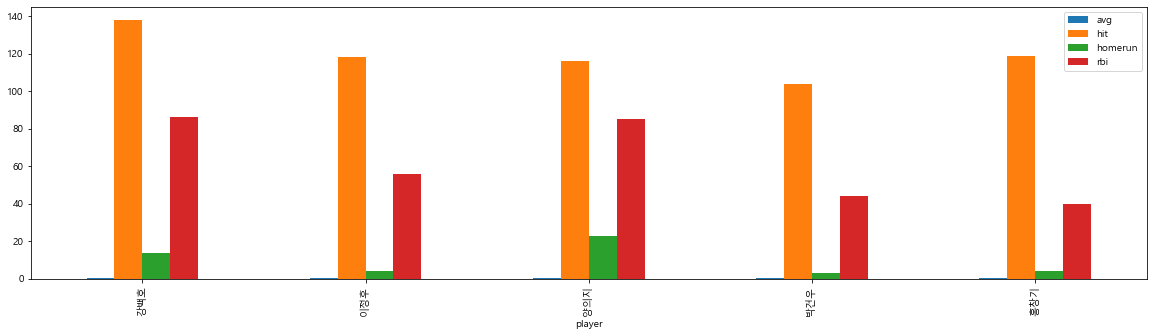

In [214]:
kbo_frm.head(5).plot(kind='bar', figsize = (20, 5))

- 네이버 영화평점

In [215]:
try : 
    html = urlopen('https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210913')
    print(html)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else : 
    soup = BeautifulSoup(html.read(), 'html.parser')
    print(soup)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20210913" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [225]:
# 영화 제목과 평점 전체 데이터 
title_all = soup.find_all('div', {'class' : 'tit5'})
point_all = soup.find_all('td', {'class' : 'point'})


In [230]:
title_list = []
for i in range(0, len(title_all)):
    title_list.append(title_all[i].text.strip())
title_list

['코다',
 '모던 타임즈',
 '위대한 독재자',
 '해피 투게더',
 '바울',
 '프리 가이',
 '꽃다발 같은 사랑을 했다',
 '번지 점프를 하다',
 '윤희에게',
 '신세계',
 '이별의 아침에 약속의 꽃을 장식하자',
 '중경삼림',
 '너의 이름은.',
 '부에나 비스타 소셜 클럽',
 '화양연화',
 '캡틴 판타스틱',
 '드림걸즈',
 '분노',
 '너와 파도를 탈 수 있다면',
 '노매드랜드',
 '블랙 위도우',
 '아비정전',
 '너의 췌장을 먹고 싶어',
 '모가디슈',
 '우리의 20세기',
 '이스케이프 룸 2: 노 웨이 아웃',
 '릴리 슈슈의 모든 것',
 '하나와 앨리스',
 '너의 췌장을 먹고 싶어',
 '맨 인 더 다크 2',
 '날씨의 아이',
 '소셜 네트워크',
 '그린 나이트',
 '독전',
 '기담',
 '호우시절',
 '인질',
 '더 수어사이드 스쿼드',
 '레미니센스',
 '악녀',
 '싱크홀',
 '올드',
 '샹치와 텐 링즈의 전설',
 '쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?',
 '귀문']

In [231]:
point_list = []
for i in range(0, len(point_all)):
    point_list.append(point_all[i].text.strip())
point_list

['9.35',
 '9.32',
 '9.23',
 '9.19',
 '9.17',
 '9.10',
 '9.08',
 '8.98',
 '8.96',
 '8.93',
 '8.91',
 '8.91',
 '8.80',
 '8.78',
 '8.77',
 '8.59',
 '8.58',
 '8.55',
 '8.53',
 '8.48',
 '8.47',
 '8.47',
 '8.39',
 '8.33',
 '8.25',
 '8.16',
 '8.11',
 '8.10',
 '8.10',
 '8.04',
 '7.95',
 '7.84',
 '7.60',
 '7.52',
 '7.49',
 '7.40',
 '7.36',
 '7.08',
 '7.03',
 '6.97',
 '6.78',
 '6.72',
 '6.66',
 '6.51',
 '4.47']

In [235]:
movie_frm = pd.DataFrame({'title' : title_list, 
              'point' : point_list})

,title,point
0,코다,9.35
1,모던 타임즈,9.32
2,위대한 독재자,9.23
3,해피 투게더,9.19
4,바울,9.17
5,프리 가이,9.10
6,꽃다발 같은 사랑을 했다,9.08
7,번지 점프를 하다,8.98
8,윤희에게,8.96
9,신세계,8.93


In [237]:
# list comprehenshio 사용 : 간단
movie_title = [title_all[i].a.get_text()
              for i in range(0, len(title_all))]
movie_title

['코다',
 '모던 타임즈',
 '위대한 독재자',
 '해피 투게더',
 '바울',
 '프리 가이',
 '꽃다발 같은 사랑을 했다',
 '번지 점프를 하다',
 '윤희에게',
 '신세계',
 '이별의 아침에 약속의 꽃을 장식하자',
 '중경삼림',
 '너의 이름은.',
 '부에나 비스타 소셜 클럽',
 '화양연화',
 '캡틴 판타스틱',
 '드림걸즈',
 '분노',
 '너와 파도를 탈 수 있다면',
 '노매드랜드',
 '블랙 위도우',
 '아비정전',
 '너의 췌장을 먹고 싶어',
 '모가디슈',
 '우리의 20세기',
 '이스케이프 룸 2: 노 웨이 아웃',
 '릴리 슈슈의 모든 것',
 '하나와 앨리스',
 '너의 췌장을 먹고 싶어',
 '맨 인 더 다크 2 ',
 '날씨의 아이',
 '소셜 네트워크',
 '그린 나이트',
 '독전',
 '기담',
 '호우시절',
 '인질',
 '더 수어사이드 스쿼드',
 '레미니센스',
 '악녀',
 '싱크홀',
 '올드',
 '샹치와 텐 링즈의 전설',
 '쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?',
 '귀문']

In [240]:
# dummy date 생성
print('date_range() - 임의의 날짜 생성')
date_list = pd.date_range('2021-09-14', periods = 45)

date_range() - 임의의 날짜 생성


In [242]:
movie_frm = pd.DataFrame({'date' : date_list,
                          'title' : title_list, 
                          'point' : point_list})
movie_frm['point'] = movie_frm['point'].astype(float)
movie_frm

,date,title,point
0,2021-09-14,코다,9.35
1,2021-09-15,모던 타임즈,9.32
2,2021-09-16,위대한 독재자,9.23
3,2021-09-17,해피 투게더,9.19
4,2021-09-18,바울,9.17
5,2021-09-19,프리 가이,9.10
6,2021-09-20,꽃다발 같은 사랑을 했다,9.08
7,2021-09-21,번지 점프를 하다,8.98
8,2021-09-22,윤희에게,8.96
9,2021-09-23,신세계,8.93


- IMDb

In [244]:
try : 
    html = urlopen('https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3')
    print(html)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else : 
    soup = BeautifulSoup(html.read(), 'html.parser')
    print(soup)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Avengers: Infinity War (2018) - Avengers: Infinity War (2018) - User Reviews - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/title/tt4154756/reviews" rel="canonical"/>


In [296]:
point_all = soup.find_all('span', {'class' : 'rating-other-user-rating'})
title_all = soup.find_all('a', {'class' : 'title'})
writer_all = soup.select('div>span>a')[0::2]
date_all = soup.find_all('span', {'class' : 'review-date'})
content_all = soup.find_all('div', {'class' : 'text'})

review_point = [point_all[i].text.strip()
              for i in range(0, len(point_all))]
review_title = [title_all[i].text.strip()
              for i in range(0, len(title_all))]
review_writer = [writer_all[i].text.strip()
              for i in range(0, len(writer_all))]
review_date = [date_all[i].text.strip()
              for i in range(0, len(date_all))]
review_content = [content_all[i].text.strip()
              for i in range(0, len(content_all))]

review_frm = pd.DataFrame({'title' : review_title,
                           'writer' : review_writer,
                           'date' : review_date,
                          'content' : review_content})
review_frm

,title,writer,date,content
0,Better than Endgame,grztxks,14 March 2021,Infinity war is one of the best MCU protects. ...
1,A film that pulled off the impossible.,cartermain,20 January 2021,Avengers: Infinity War is a film that should b...
2,EPIC,lalit28595,27 July 2021,Infinity war seemed much better than endgame t...
3,"Best movie of the MCU, incredible from start t...",RJBrez,24 January 2021,Infinity War is remembered mostly for how it e...
4,Best Cliffhanger of all Time,Alex_Lo,5 February 2021,A meticulously planned film down to the last d...
5,Much better than END GAME,ssatvaya-16480,19 June 2021,"AVENGERS:INFINITY WAR,to say in one line,is pe..."
6,Great,MR_Heraclius,23 February 2020,This movie portrays a villain that by far has ...
7,Still the best,RogerGlassFilm,29 July 2021,Even after endgame i still think this movie is...
8,EMOTIONAL ROLLER COASTER,andreascaloni,16 February 2021,Avengers infinity war is an emotional roller c...
9,To this day one of the most impossible films t...,uzair-36867,8 February 2021,This film is an achievement unto itself. Unlik...


In [297]:
point_all

[<span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 <span>10</span><span class="point-scale">/10</span>
 </span>,
 <span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 <span>10</span><span class="point-scale">/10</span>
 </span>,
 <span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 

24